### I am importing random for random number to determine if someone gets sick or not

In [11]:
import random

### let's design our Person class with attributes listed above and methods listed above
Person Object

In [47]:
class Person(object):
    def __init__(self, default_days_sick = 5, default_infection_rate = 10, vac = False, cant_vacs = 0, default_max_vac = 4):
        self.ID = 0
        self.age = 0
        self.status = "Susceptible"
        self.days_sick = 0
        self.max_days_sick = default_days_sick
        self.infection_rate = default_infection_rate
        self.interactions = []
        self.is_vac = vac
        self.cant_vacs = cant_vacs
        self.max_vac = default_max_vac 
        
        if (self.is_vac):
            self.infection_rate = self.infection_rate/2
        
    def set_is_vac(self, vac, cant_vacs):
        self.is_vac = vac
        
        if (self.is_vac):
            self.cant_vacs = cant_vacs + 1
            self.infection_rate = self.infection_rate/(2*self.cant_vacs)
            
    def get_is_vac(self):
        return self.is_vac
    
    def get_cant_vacs(self):
        return self.cant_vacs
        
    def set_infection_rate(self, new_rate):
        self.infection_rate = new_rate
    
    def infect(self, number_of_days):
        self.days_sick = number_of_days
        self.status = "Infected"
        
    def recover(self):
        self.days_sick = 0
        self.status = "Recovered"
        
    def roll_for_infection(self):
        if (random.randint(0,101) < self.infection_rate):
            self.infect(self.max_days_sick)
            
    def get_status(self):
        return self.status
    
    def get_days_sick(self):
        return self.days_sick
    
    def update(self):
        if (self.status == "Susceptible"):
            self.roll_for_infection()
            
        elif (self.status == "Infected"):
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
                
                
    
    

In [9]:
Joe = Person()
print ("Joe is currently:", Joe.get_status(), "Joe has been sick for", Joe.get_days_sick(), " days")

Joe is currently: Susceptible Joe has been sick for 0  days


In [5]:
Joe.infect(30)

In [6]:
print ("Joe is currently:", Joe.get_status(), ", Joe will be sick for", Joe.get_days_sick(), " days")

Joe is currently: Infected , Joe will be sick for 30  days


In [12]:
day = 0
Joe = Person()

while (Joe.get_status() != "Recovered"):
    day = day + 1
    Joe.update()
    print ("Day", day)
    print ("Joe is currently:", Joe.get_status(), ", Joe will be sick for", Joe.get_days_sick(), " days")

Day 1
Joe is currently: Susceptible , Joe will be sick for 0  days
Day 2
Joe is currently: Susceptible , Joe will be sick for 0  days
Day 3
Joe is currently: Susceptible , Joe will be sick for 0  days
Day 4
Joe is currently: Susceptible , Joe will be sick for 0  days
Day 5
Joe is currently: Infected , Joe will be sick for 5  days
Day 6
Joe is currently: Infected , Joe will be sick for 4  days
Day 7
Joe is currently: Infected , Joe will be sick for 3  days
Day 8
Joe is currently: Infected , Joe will be sick for 2  days
Day 9
Joe is currently: Infected , Joe will be sick for 1  days
Day 10
Joe is currently: Recovered , Joe will be sick for 0  days


### Something is still not quite right, the code works
### but there's still too much going on
---

#### We need a Population Class

## Population Object

In [91]:
class Population(object):
    def __init__(self, number_of_people=1000, default_interactions=10, default_days_sick=5,
                 default_infection_rate=10, default_percentage_vac=0, default_max_vac = 4):
        self.People = []
        self.population_count = number_of_people
        self.number_of_interactions = default_interactions
        self.max_days_sick = default_days_sick
        self.infection_rate = default_infection_rate
        self.max_vac = default_max_vac
        self.number_vac = number_of_people*(default_percentage_vac/100)
        
        
        ## set Patient_Zero aka The Jerk
        patient_zero = Person()
        patient_zero.infect(self.max_days_sick)
        
        ## add patient_zero to our People[]
        
        self.People.append(patient_zero)
        
        ## build the rest of our Population #######################################################     
        for i in range(0, self.population_count):
            new_person = Person()
            if (i <= self.number_vac/4):
                new_person.set_is_vac(True, new_person.get_cant_vacs())
                            
            elif(i > self.number_vac/4 and i <= self.number_vac/2):
                new_person.set_is_vac(True, new_person.get_cant_vacs())
                new_person.set_is_vac(True, new_person.get_cant_vacs())
                
            elif(i > self.number_vac/2 and i <= self.number_vac):
                new_person.set_is_vac(True, new_person.get_cant_vacs())
                new_person.set_is_vac(True, new_person.get_cant_vacs())
                new_person.set_is_vac(True, new_person.get_cant_vacs())
            
             
            self.People.append(new_person)   
            
            
    #return mumber of people vaccineted
    def get_number_vac(self):
        return self.number_vac;
    
    def get_number_vac_infected(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_status() == "Infected" and the_person.get_is_vac() == True):
                count = count + 1
        
        return count
    
    ####
    
    def get_people_one_vac(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_is_vac() == True and the_person.get_cant_vacs() == 1):
                count = count + 1
        
        return count
########################################################################
    def get_people_two_vac(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_is_vac() == True and the_person.get_cant_vacs() == 2):
                count = count + 1
        
        return count
    ######
    def get_people_three_vac(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_is_vac() == True and the_person.get_cant_vacs() == 3):
                count = count + 1
        
        return count
    
    
    ##go through our population, and count each person that's susceptible
    def number_of_susceptible(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_status() == "Susceptible"):
                count = count + 1
        
        return count
    
    ##go through the population, and count each person that's infected
    def number_of_infected(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_status() == "Infected"):
                count = count + 1
        
        return count
    
    ##go through the population, and count each person that's recovered
    def number_of_recovered(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_status() == "Recovered"):
                count = count + 1
                
        return count
    
    ##Total Population
    def get_population_count(self):
        return len(self.People)
    
    
    def update(self):
        
        ##we're going to make a list of People who might get
        ##infected at the end of the day
        
        might_get_sick = []
        
        ## go through my Population and see who might get sick
        for person in self.People:
            person.interactions = []
            
            ## each person inteteracts w/ number_of_interaction number of people
            
            for i in range(0, self.number_of_interactions):
                r = random.randint(0, self.population_count)
                person.interactions.append(r)
            
            ## if person is infected, their interactions might get infected
            if (person.get_status() == "Infected"):
                ##????? really????
                person.update()
                
                for j in person.interactions:
                    if (self.People[j].get_status() == "Susceptible"):
                        might_get_sick.append(self.People[j])
            
            ## if person is susceptible, they interact w/ someone infected
            if (person.get_status() == "Susceptible"):
                for j in person.interactions:
                    if (self.People[j].get_status() == "Infected"):
                        might_get_sick.append(person)
                        
        ##the above updates each person who is infected
        ##I have a list of people who **might** get infected
        ##each person in that list, has to roll to get infected
        
        for person in might_get_sick:
            person.roll_for_infection()
            
            
    def get_population_list(self):
        return self.People
    

### Our Main Code!
 Community Object 

In [68]:
##Build our Community

myCommunity = Population(1200)
day = 0
number_infected = myCommunity.number_of_infected()
while (number_infected > 0):
    number_infected = myCommunity.number_of_infected()
    number_recovered = myCommunity.number_of_recovered()
    print("day:", day, "infected:", "recovered:", number_recovered)
    
    day = day + 1
    myCommunity.update()



day: 0 infected: recovered: 0
day: 1 infected: recovered: 0
day: 2 infected: recovered: 0
day: 3 infected: recovered: 0
day: 4 infected: recovered: 0
day: 5 infected: recovered: 1
day: 6 infected: recovered: 2
day: 7 infected: recovered: 3
day: 8 infected: recovered: 7
day: 9 infected: recovered: 12
day: 10 infected: recovered: 23
day: 11 infected: recovered: 47
day: 12 infected: recovered: 84
day: 13 infected: recovered: 152
day: 14 infected: recovered: 281
day: 15 infected: recovered: 459
day: 16 infected: recovered: 673
day: 17 infected: recovered: 855
day: 18 infected: recovered: 1016
day: 19 infected: recovered: 1105
day: 20 infected: recovered: 1155
day: 21 infected: recovered: 1176
day: 22 infected: recovered: 1186
day: 23 infected: recovered: 1192
day: 24 infected: recovered: 1192
day: 25 infected: recovered: 1193


In [92]:
##Build our Community
##number_of_people=1000, default_interactions=10, default_days_sick=5,
##default_infection_rate=10, default_percentage_vac=0):

myCommunity = Population(12000, 10, 5, 10, 50)
print ("Population:",myCommunity.get_population_count())
print ("Number vac:", myCommunity.get_number_vac())
my_plot2 = []

day = 0
number_infected = myCommunity.number_of_infected()
while (number_infected > 0):
    number_infected = myCommunity.number_of_infected()
    number_recovered = myCommunity.number_of_recovered()
    people_vac = myCommunity.get_number_vac_infected()
    people_one_vac = myCommunity.get_people_one_vac()
    people_two_vac = myCommunity.get_people_two_vac()
    people_three_vac = myCommunity.get_people_three_vac()
    my_plot2.append([day, number_infected, number_recovered])
    
    print("day:", day, "infected:", number_infected, "vac+infected:", 
          people_vac, "recovered:", number_recovered, "dosis=1", people_one_vac,
         "dosis=2", people_two_vac, "dosis=3", people_three_vac)
    
    day = day + 1
    myCommunity.update()

Population: 12001
Number vac: 6000.0
day: 0 infected: 1 vac+infected: 0 recovered: 0 dosis=1 1501 dosis=2 1500 dosis=3 3000
day: 1 infected: 1 vac+infected: 0 recovered: 0 dosis=1 1501 dosis=2 1500 dosis=3 3000
day: 2 infected: 2 vac+infected: 0 recovered: 0 dosis=1 1501 dosis=2 1500 dosis=3 3000
day: 3 infected: 9 vac+infected: 0 recovered: 0 dosis=1 1501 dosis=2 1500 dosis=3 3000
day: 4 infected: 17 vac+infected: 2 recovered: 0 dosis=1 1501 dosis=2 1500 dosis=3 3000
day: 5 infected: 47 vac+infected: 7 recovered: 1 dosis=1 1501 dosis=2 1500 dosis=3 3000
day: 6 infected: 118 vac+infected: 19 recovered: 1 dosis=1 1501 dosis=2 1500 dosis=3 3000
day: 7 infected: 263 vac+infected: 48 recovered: 2 dosis=1 1501 dosis=2 1500 dosis=3 3000
day: 8 infected: 552 vac+infected: 115 recovered: 9 dosis=1 1501 dosis=2 1500 dosis=3 3000
day: 9 infected: 1165 vac+infected: 232 recovered: 17 dosis=1 1501 dosis=2 1500 dosis=3 3000
day: 10 infected: 2229 vac+infected: 452 recovered: 48 dosis=1 1501 dosis=2

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
df = pd.DataFrame(my_plot, columns=['day','number_infected', 'number_recovered'])

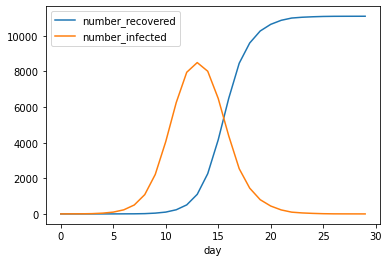

In [90]:
fig = plt.figure()
ax1 = plt.gca()
fig1 = df.plot(kind='line', x='day', y='number_recovered', ax=ax1).get_figure()
fig2 = df.plot(kind='line', x='day', y='number_infected', ax=ax1).get_figure()
plt.savefig('test.png')
plt.show()

In [94]:
df2 = pd.DataFrame(my_plot2, columns=['day','number_infected', 'number_recovered'])

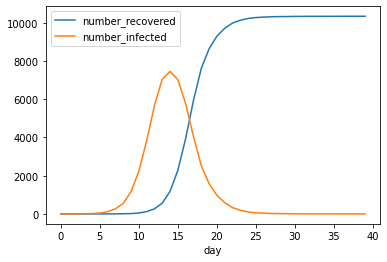

In [95]:
fig = plt.figure()
ax1 = plt.gca()
fig1 = df2.plot(kind='line', x='day', y='number_recovered', ax=ax1).get_figure()
fig2 = df2.plot(kind='line', x='day', y='number_infected', ax=ax1).get_figure()
plt.savefig('test2.png')
plt.show()

In [96]:
df.to_csv("mydata.csv")
df2.to_csv("mydata2.csv")